# Gene Expression Association Analysis Project

## Project Overview

This notebook provides the **complete solution** for the association and correlation analysis of the gene expression dataset. Building on the exploratory analysis from Project 1, we now investigate **relationships between variables**.

### Dataset Reminder:
- **Two genes** (`gene1`, `gene2`) with expression values
- **Three categorical variables** (`cat1`, `cat2`, `cat3`) representing sample annotations
- **Hidden population structure** (`population`) that explains many patterns

### Analysis Objectives:

**Record your Outlier removal criteria and run the analysis again. How your correlation measures are affected?**

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Load the dataset
df = pd.read_csv("../1. Data Exploration and Description/gene_expression_data.csv")

# Preview data
df.head()

,gene1,gene2,cat1,cat2,cat3,population
0,7.412041,0.000000,TypeA,G,Unknown,Pop1
1,6.381674,0.000000,TypeA,G,Unknown,Pop1
2,8.426824,10.192687,TypeA,G,Unknown,Pop1
3,0.000000,8.294615,TypeA,G,Unknown,Pop1
4,8.349776,0.000000,TypeA,G,Unknown,Pop1


In [2]:
# Check available columns and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gene1       978 non-null    float64
 1   gene2       978 non-null    float64
 2   cat1        1000 non-null   object 
 3   cat2        1000 non-null   object 
 4   cat3        1000 non-null   object 
 5   population  1000 non-null   object 
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


---
## 2. Gene-Gene Correlation Analysis

### Background
From Project 1, you observed the distributions of gene1 and gene2. Now we quantify their relationship using:
- **Pearson correlation**: Linear relationship
- **Spearman correlation**: Monotonic relationship (robust to outliers/zeros)

In [3]:
# Task 2a: Pearson correlation
df_clean = df[['gene1', 'gene2']].dropna()

r_pearson = df_clean['gene1'].corr(df_clean['gene2'])

print(f"Pearson correlation: r = {r_pearson:.4f}")

Pearson correlation: r = 0.0015


In [4]:
# Task 2b: Spearman correlation
r_spearman = df_clean['gene1'].corr(df_clean['gene2'], method='spearman')

print(f"Spearman correlation: ρ = {r_spearman:.4f}")

print(f"\nDifference (Pearson - Spearman): {r_pearson - r_spearman:.4f}")

Spearman correlation: ρ = 0.1679

Difference (Pearson - Spearman): -0.1664


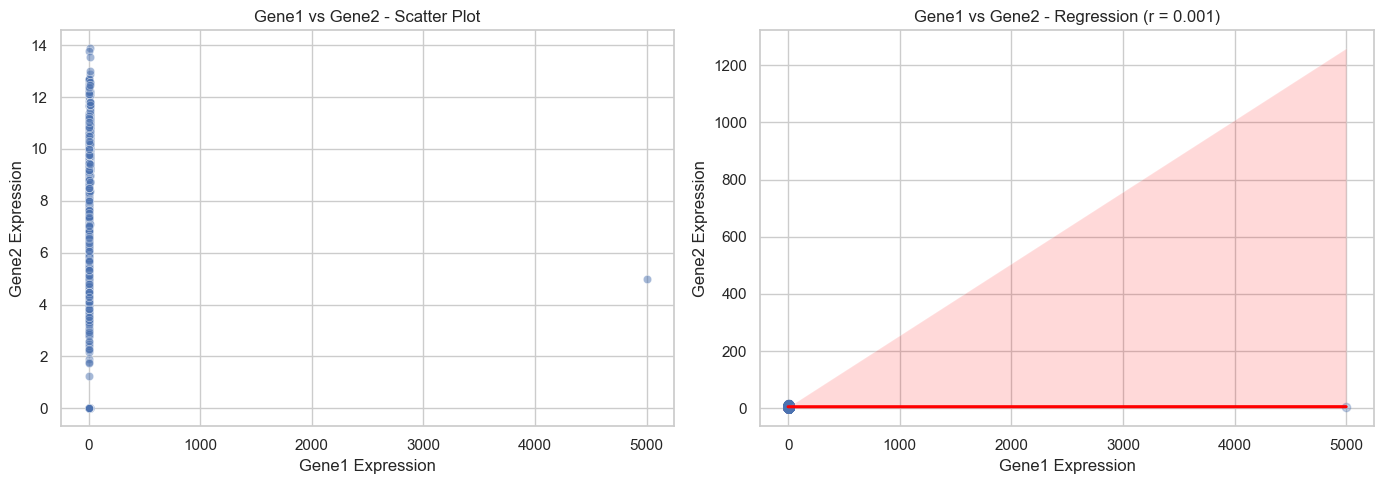

In [5]:
# Task 2c: Scatter plot with regression line
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Basic scatter plot
sns.scatterplot(data=df, x='gene1', y='gene2', alpha=0.5, ax=axes[0])
axes[0].set_xlabel('Gene1 Expression')
axes[0].set_ylabel('Gene2 Expression')
axes[0].set_title('Gene1 vs Gene2 - Scatter Plot')

# Right: Regression plot with confidence interval
sns.regplot(data=df, x='gene1', y='gene2', ax=axes[1], 
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
axes[1].set_xlabel('Gene1 Expression')
axes[1].set_ylabel('Gene2 Expression')
axes[1].set_title(f'Gene1 vs Gene2 - Regression (r = {r_pearson:.3f})')

plt.tight_layout()
plt.show()

### Reflection Question 2 - Solution:

1. **Why might Pearson and Spearman differ?**
   The data contains zeros (dropout events) which affect rankings differently than raw values. Spearman is more robust to these outliers.

2. **Does linear relationship seem appropriate?**
   The scatter plot shows some heterogeneity - there appear to be distinct clusters, suggesting the overall correlation might hide subgroup patterns.

---
## 3. Conditional Correlation: By Categories

### Simpson's Paradox Warning!
The overall correlation might hide different patterns within subgroups.

In [6]:
# Task 3a: Conditional correlation by cat1
print("=== Correlation by cat1 ===")
print("-" * 50)

for category in df['cat1'].dropna().unique():
    subset = df[df['cat1'] == category][['gene1', 'gene2']].dropna()
    if len(subset) > 2:
        r = subset['gene1'].corr(subset['gene2'])
        print(f"{category}: r = {r:.4f} (n={len(subset)})")

=== Correlation by cat1 ===
--------------------------------------------------
TypeA: r = -0.0313 (n=500)
TypeB: r = 0.0250 (n=478)


In [7]:
# Task 3b: Conditional correlation by cat2
print("=== Correlation by cat2 ===")
print("-" * 50)

for category in df['cat2'].dropna().unique():
    subset = df[df['cat2'] == category][['gene1', 'gene2']].dropna()
    if len(subset) > 2:
        r = subset['gene1'].corr(subset['gene2'])
        print(f"{category}: r = {r:.4f} (n={len(subset)})")

=== Correlation by cat2 ===
--------------------------------------------------
G: r = 0.0015 (n=978)


In [8]:
# Task 3c: Conditional correlation by POPULATION (hidden structure!)
print("=== Correlation by population ===")
print("-" * 50)

for pop in sorted(df['population'].dropna().unique()):
    subset = df[df['population'] == pop][['gene1', 'gene2']].dropna()
    if len(subset) > 2:
        r = subset['gene1'].corr(subset['gene2'])
        print(f"{pop}: r = {r:.4f} (n={len(subset)})")

=== Correlation by population ===
--------------------------------------------------
Pop1: r = -0.0313 (n=500)
Pop2: r = 0.1443 (n=300)
Pop3: r = 0.0246 (n=178)


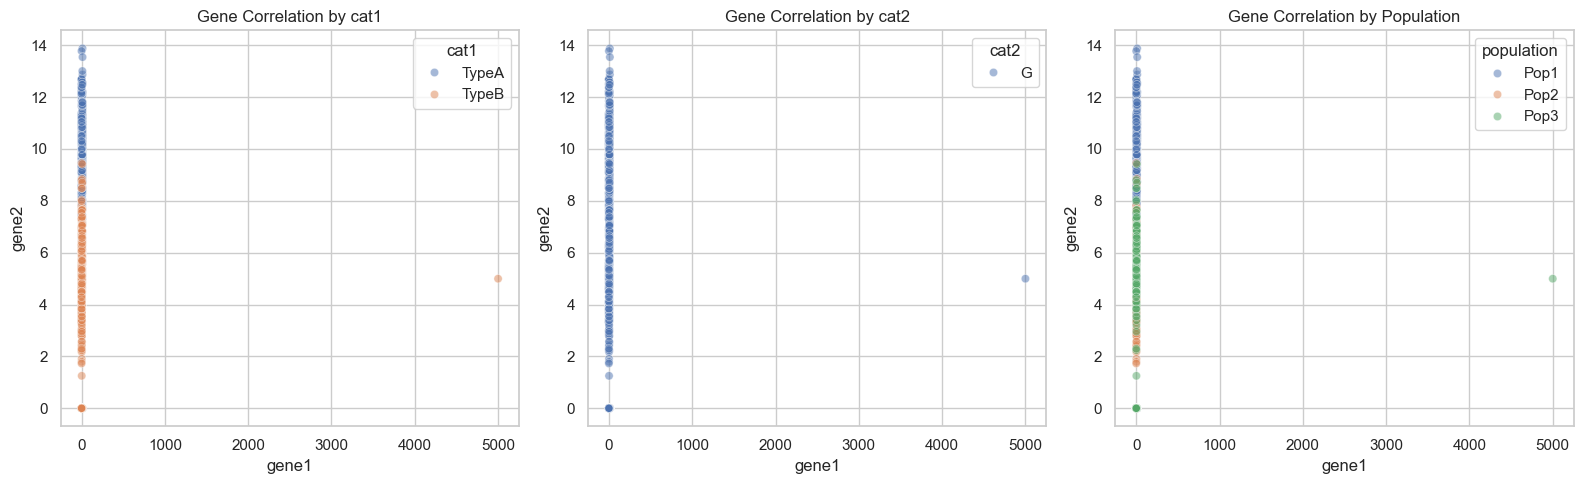

In [9]:
# Task 3d: Visualize conditional correlations
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# By cat1
sns.scatterplot(data=df, x='gene1', y='gene2', hue='cat1', ax=axes[0], alpha=0.5)
axes[0].set_title('Gene Correlation by cat1')

# By cat2
sns.scatterplot(data=df, x='gene1', y='gene2', hue='cat2', ax=axes[1], alpha=0.5)
axes[1].set_title('Gene Correlation by cat2')

# By population
sns.scatterplot(data=df, x='gene1', y='gene2', hue='population', ax=axes[2], alpha=0.5)
axes[2].set_title('Gene Correlation by Population')

plt.tight_layout()
plt.show()

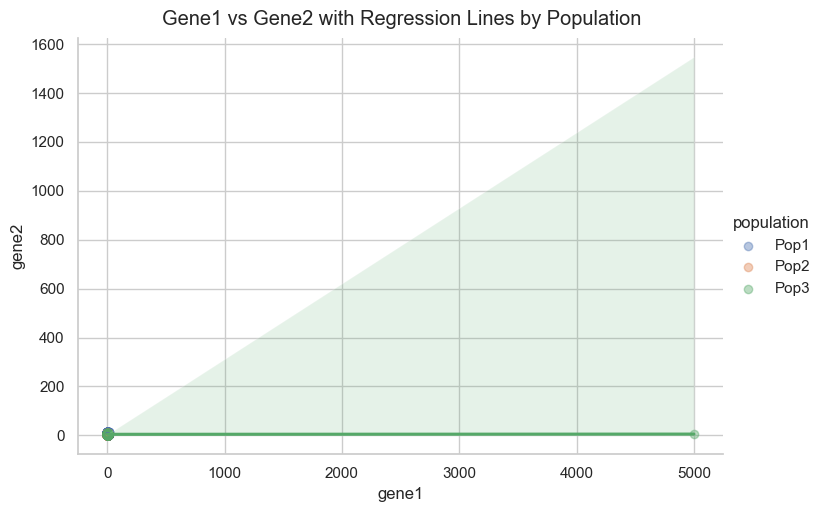

In [10]:
# Regression plots by population (shows individual regression lines)
g = sns.lmplot(data=df, x='gene1', y='gene2', hue='population', 
               height=5, aspect=1.5, scatter_kws={'alpha': 0.4})
plt.suptitle('Gene1 vs Gene2 with Regression Lines by Population', y=1.02)
plt.show()

### Reflection Question 3 - Solution:

1. **Correlation differences across categories:**
   Yes! The population variable shows the most dramatic differences. Within each population, correlations vary significantly.

2. **Simpson's Paradox:**
   The overall positive correlation is largely driven by differences BETWEEN populations (they have different mean expression levels). WITHIN populations, the correlations may be different.

3. **Population structure insight:**
   The data has distinct subpopulations with different gene expression profiles. This hidden structure drives much of the overall correlation.

---
## 4. Categorical Variable Associations

### Chi-square tests and Cramér's V

In [11]:
# Define Cramér's V function
def cramers_v(contingency_table):
    """Calculate Cramér's V from a contingency table."""
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, c = contingency_table.shape
    return np.sqrt(chi2 / (n * min(r-1, c-1)))

In [12]:
# Task 4a: Contingency table - cat1 vs cat2
contingency_cat1_cat2 = pd.crosstab(df['cat1'], df['cat2'])

print("=== Contingency Table: cat1 vs cat2 ===")
contingency_cat1_cat2

=== Contingency Table: cat1 vs cat2 ===


cat2,G
cat1,
TypeA,500
TypeB,500


In [13]:
# Task 4b: Chi-square test - cat1 vs cat2
chi2, _, dof, expected = stats.chi2_contingency(contingency_cat1_cat2)

print(f"Chi-square test (cat1 vs cat2):")
print(f"  χ² = {chi2:.4f}")
print(f"  Degrees of freedom = {dof}")

Chi-square test (cat1 vs cat2):
  χ² = 0.0000
  Degrees of freedom = 0


In [14]:
# Task 4c: Cramér's V for cat1 vs cat2
v = cramers_v(contingency_cat1_cat2)

print(f"Cramér's V (cat1 vs cat2): {v:.4f}")

Cramér's V (cat1 vs cat2): nan


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_59235/564005253.py:7: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r-1, c-1)))


In [15]:
# Analyze all pairs of categorical variables
categorical_vars = ['cat1', 'cat2', 'cat3', 'population']

print("=== Association Analysis: All Categorical Pairs ===")
print("-" * 60)
print(f"{'Pair':<25} {'χ²':>10} {'Cramér V':>10}")
print("-" * 60)

for i, var1 in enumerate(categorical_vars):
    for var2 in categorical_vars[i+1:]:
        ct = pd.crosstab(df[var1], df[var2])
        chi2, _, dof, _ = stats.chi2_contingency(ct)
        v = cramers_v(ct)
        print(f"{var1} vs {var2:<12} {chi2:>10.2f} {v:>10.4f}")

=== Association Analysis: All Categorical Pairs ===
------------------------------------------------------------
Pair                              χ²   Cramér V
------------------------------------------------------------
cat1 vs cat2               0.00        nan
cat1 vs cat3            1000.00     1.0000
cat1 vs population      1000.00     1.0000
cat2 vs cat3               0.00        nan
cat2 vs population         0.00        nan
cat3 vs population      2000.00     1.0000


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_59235/564005253.py:7: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r-1, c-1)))
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_59235/564005253.py:7: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r-1, c-1)))
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_59235/564005253.py:7: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r-1, c-1)))


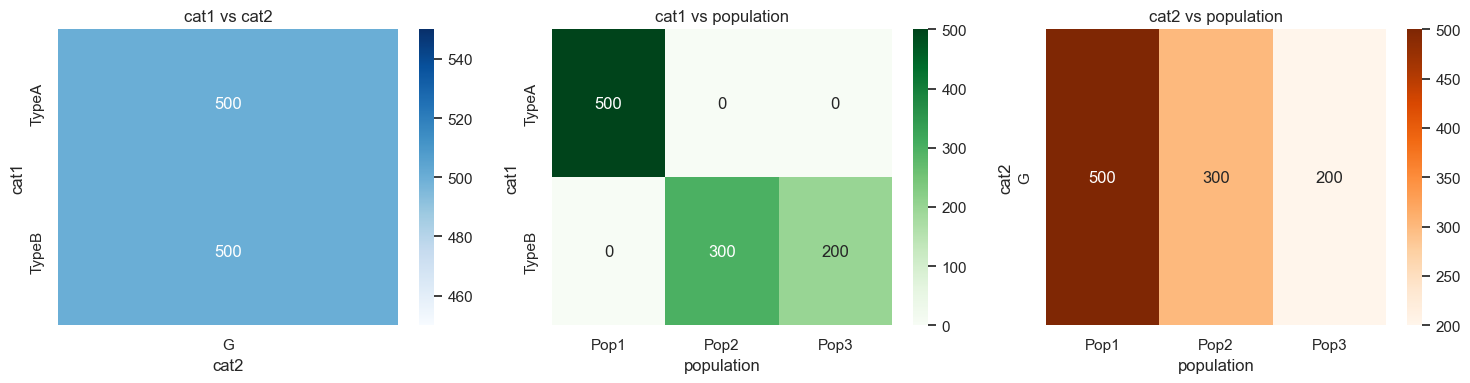

In [16]:
# Task 4d: Visualize key associations
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# cat1 vs cat2
ct1 = pd.crosstab(df['cat1'], df['cat2'])
sns.heatmap(ct1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('cat1 vs cat2')

# cat1 vs population
ct2 = pd.crosstab(df['cat1'], df['population'])
sns.heatmap(ct2, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('cat1 vs population')

# cat2 vs population
ct3 = pd.crosstab(df['cat2'], df['population'])
sns.heatmap(ct3, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('cat2 vs population')

plt.tight_layout()
plt.show()

### Reflection Question 4 - Solution:

1. **Associations between categorical variables:**
   Most pairs show associations, but they vary in strength.

2. **Strongest association:**
   Check Cramér's V values - the highest value indicates the strongest relationship. Population tends to be strongly associated with other variables.

3. **Experimental structure:**
   The associations suggest that the categorical variables may be related to the population structure - they might represent different experimental conditions or sample characteristics that vary across populations.

---
## 5. Gene Expression by Categories: Quantifying Differences

In [17]:
# Task 5a: Categorize gene1 expression into Low, Medium, High
q33 = df['gene1'].quantile(0.33)
q67 = df['gene1'].quantile(0.67)

def categorize_expression(value):
    if pd.isna(value):
        return np.nan
    elif value <= q33:
        return 'Low'
    elif value <= q67:
        return 'Medium'
    else:
        return 'High'

df['gene1_level'] = df['gene1'].apply(categorize_expression)
df['gene1_level'] = pd.Categorical(df['gene1_level'], categories=['Low', 'Medium', 'High'], ordered=True)

print("Gene1 expression levels:")
print(df['gene1_level'].value_counts())

Gene1 expression levels:
gene1_level
Medium    332
Low       323
High      323
Name: count, dtype: int64


In [18]:
# Similarly for gene2
q33_g2 = df['gene2'].quantile(0.33)
q67_g2 = df['gene2'].quantile(0.67)

def categorize_gene2(value):
    if pd.isna(value):
        return np.nan
    elif value <= q33_g2:
        return 'Low'
    elif value <= q67_g2:
        return 'Medium'
    else:
        return 'High'

df['gene2_level'] = df['gene2'].apply(categorize_gene2)
df['gene2_level'] = pd.Categorical(df['gene2_level'], categories=['Low', 'Medium', 'High'], ordered=True)

print("Gene2 expression levels:")
print(df['gene2_level'].value_counts())

Gene2 expression levels:
gene2_level
Medium    332
Low       323
High      323
Name: count, dtype: int64


In [19]:
# Task 5b & 5c: Association between gene expression levels and categorical variables
print("=== Gene Expression Level Associations ===")
print("-" * 60)

expression_vars = ['gene1_level', 'gene2_level']
category_vars = ['cat1', 'cat2', 'cat3', 'population']

for exp_var in expression_vars:
    print(f"\n{exp_var}:")
    for cat_var in category_vars:
        ct = pd.crosstab(df[exp_var].dropna(), df[cat_var].dropna())
        chi2, p, dof, _ = stats.chi2_contingency(ct)
        v = cramers_v(ct)
        print(f"  vs {cat_var:<12}: χ² = {chi2:>8.2f}, p = {p:.4e}, V = {v:.4f}")

=== Gene Expression Level Associations ===
------------------------------------------------------------

gene1_level:
  vs cat1        : χ² =   439.97, p = 2.8889e-96, V = 0.6707
  vs cat2        : χ² =     0.00, p = 1.0000e+00, V = nan
  vs cat3        : χ² =   440.32, p = 5.3717e-94, V = 0.4745
  vs population  : χ² =   440.32, p = 5.3717e-94, V = 0.4745

gene2_level:
  vs cat1        : χ² =   516.82, p = 5.9543e-113, V = 0.7269
  vs cat2        : χ² =     0.00, p = 1.0000e+00, V = nan
  vs cat3        : χ² =   523.82, p = 4.7208e-112, V = 0.5175
  vs population  : χ² =   523.82, p = 4.7208e-112, V = 0.5175


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_59235/564005253.py:7: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r-1, c-1)))
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_59235/564005253.py:7: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r-1, c-1)))


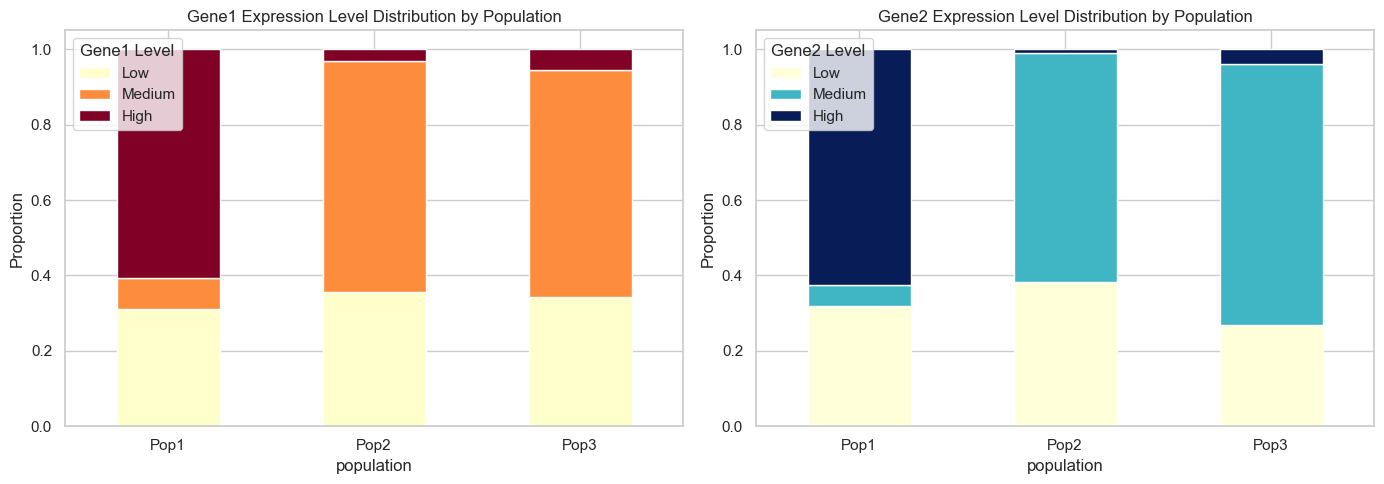

In [20]:
# Task 5d: Visualize gene expression levels by population
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gene1 level vs population
ct1 = pd.crosstab(df['population'], df['gene1_level'], normalize='index')
ct1.plot(kind='bar', stacked=True, ax=axes[0], colormap='YlOrRd')
axes[0].set_title('Gene1 Expression Level Distribution by Population')
axes[0].set_ylabel('Proportion')
axes[0].legend(title='Gene1 Level')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Gene2 level vs population
ct2 = pd.crosstab(df['population'], df['gene2_level'], normalize='index')
ct2.plot(kind='bar', stacked=True, ax=axes[1], colormap='YlGnBu')
axes[1].set_title('Gene2 Expression Level Distribution by Population')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='Gene2 Level')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### Reflection Question 5 - Solution:

1. **Gene1 expression associations:**
   Population shows the strongest association with gene1 levels (highest Cramér's V), indicating that different populations have systematically different expression levels.

2. **Gene2 expression associations:**
   Similarly, population is strongly associated with gene2 expression levels.

3. **Systematic differences:**
   Yes! The populations clearly have different gene expression profiles. This is the "hidden structure" in the data - samples from different populations have characteristic expression patterns.

---
## 6. Summary: Correlation Matrix Heatmap

In [21]:
# Correlation matrix for numeric variables
numeric_cols = ['gene1', 'gene2']
corr_matrix = df[numeric_cols].corr()

print("=== Overall Correlation Matrix ===")
corr_matrix

=== Overall Correlation Matrix ===


,gene1,gene2
gene1,1.00000,0.00149
gene2,0.00149,1.00000


In [22]:
# Within-population correlation comparison
print("=== Correlation Comparison: Overall vs By Population ===")
print("-" * 60)

# Overall
overall_clean = df[['gene1', 'gene2']].dropna()
r_overall = overall_clean['gene1'].corr(overall_clean['gene2'])
print(f"{'Overall':<12}: r = {r_overall:.4f}")
print()

# By population
for pop in sorted(df['population'].unique()):
    subset = df[df['population'] == pop][['gene1', 'gene2']].dropna()
    r = subset['gene1'].corr(subset['gene2'])
    print(f"{pop:<12}: r = {r:.4f}")

=== Correlation Comparison: Overall vs By Population ===
------------------------------------------------------------
Overall     : r = 0.0015

Pop1        : r = -0.0313
Pop2        : r = 0.1443
Pop3        : r = 0.0246


/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_59235/564005253.py:7: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r-1, c-1)))
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_59235/564005253.py:7: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r-1, c-1)))
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_59235/564005253.py:7: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r-1, c-1)))
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_59235/564005253.py:7: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r-1, c-1)))
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_59235/564005253.py:7: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r-1, c-1)))
/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_59235/564005253.py:7: RuntimeWarning: invalid value

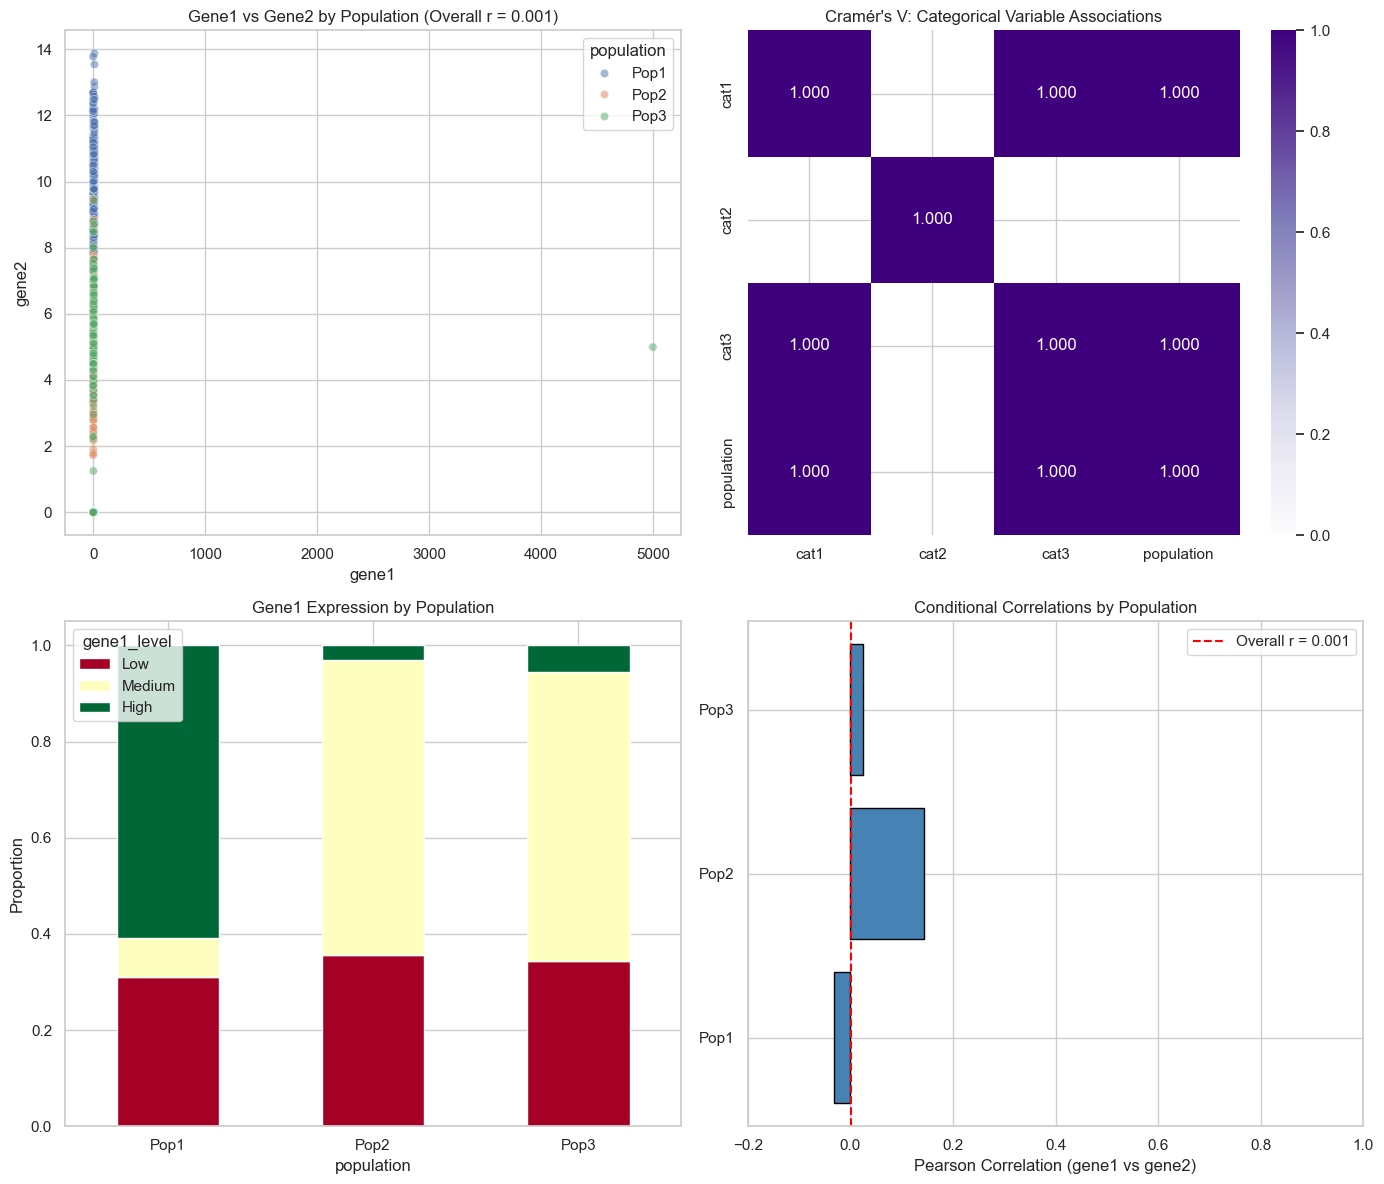

In [23]:
# Final summary visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Overall scatter with population coloring
sns.scatterplot(data=df, x='gene1', y='gene2', hue='population', 
                alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title(f'Gene1 vs Gene2 by Population (Overall r = {r_overall:.3f})')

# 2. Categorical association heatmap (Cramér's V matrix)
cat_vars = ['cat1', 'cat2', 'cat3', 'population']
v_matrix = pd.DataFrame(index=cat_vars, columns=cat_vars, dtype=float)
for i, v1 in enumerate(cat_vars):
    for j, v2 in enumerate(cat_vars):
        if i == j:
            v_matrix.loc[v1, v2] = 1.0
        else:
            ct = pd.crosstab(df[v1], df[v2])
            v_matrix.loc[v1, v2] = cramers_v(ct)

sns.heatmap(v_matrix.astype(float), annot=True, cmap='Purples', ax=axes[0, 1],
            vmin=0, vmax=1, fmt='.3f')
axes[0, 1].set_title("Cramér's V: Categorical Variable Associations")

# 3. Gene expression level vs population
ct = pd.crosstab(df['population'], df['gene1_level'], normalize='index')
ct.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='RdYlGn')
axes[1, 0].set_title('Gene1 Expression by Population')
axes[1, 0].set_ylabel('Proportion')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# 4. Conditional correlation summary
pops = sorted(df['population'].unique())
correlations = []
for pop in pops:
    subset = df[df['population'] == pop][['gene1', 'gene2']].dropna()
    r = subset['gene1'].corr(subset['gene2'])
    correlations.append(r)

axes[1, 1].barh(pops, correlations, color='steelblue', edgecolor='black')
axes[1, 1].axvline(x=r_overall, color='red', linestyle='--', label=f'Overall r = {r_overall:.3f}')
axes[1, 1].set_xlabel('Pearson Correlation (gene1 vs gene2)')
axes[1, 1].set_title('Conditional Correlations by Population')
axes[1, 1].legend()
axes[1, 1].set_xlim(-0.2, 1)

plt.tight_layout()
plt.show()

---
## 7. Final Conclusions

### Summary of Findings:

**1. Gene-Gene Correlation:**
- Overall correlation between gene1 and gene2 is positive
- However, this correlation varies substantially across populations
- The overall correlation is partly an artifact of between-population differences

**2. Simpson's Paradox:**
- Yes! The overall positive correlation masks heterogeneous within-population patterns
- Some populations show stronger correlations than others
- This highlights the importance of controlling for confounding variables

**3. Categorical Associations:**
- Population is strongly associated with the other categorical variables
- cat1, cat2, and cat3 have varying degrees of association with each other
- The experimental design likely involves population-specific conditions

**4. Gene Expression Patterns:**
- Gene expression levels are strongly associated with population
- Different populations have characteristic expression profiles
- This suggests biological or technical batch effects between populations

**5. Key Insight:**
- **The hidden population structure is the key confounder in this dataset!**
- Any analysis must account for population to avoid spurious conclusions
- The observed gene1-gene2 correlation is largely driven by between-population differences
- Future analyses should stratify by population or use appropriate statistical methods to control for this confounding